<a href="https://colab.research.google.com/github/willdata0101/UT-Austin-ML-AI-Projects/blob/main/Deep_Learning_Project_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression

# Tensorflow packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Reading the dataset

bank = pd.read_csv('bank.csv')

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Dropping 'CustomerId' and 'Surname' columns

bank.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)

In [5]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


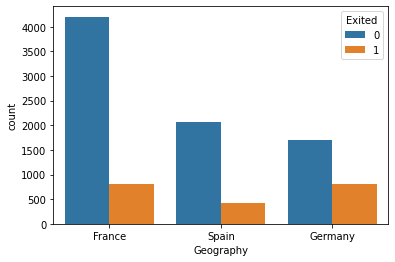

In [6]:
# Bivariate visualization - Geography and Exited

sb.countplot('Geography', hue='Exited', data=bank)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


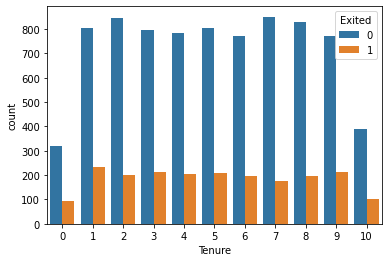

In [7]:
# Tenure and Exited

sb.countplot('Tenure', hue='Exited', data=bank)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


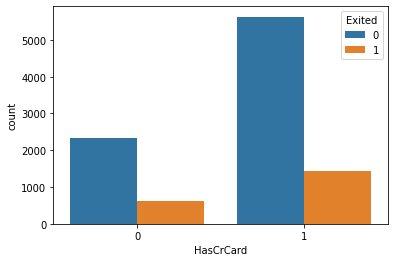

In [8]:
# HasCrCard and Exited

sb.countplot('HasCrCard', hue='Exited', data=bank)

In [9]:
# One-hot-encoding categorical features

bank = pd.get_dummies(bank, columns=['Geography', 'Gender'])

In [10]:
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


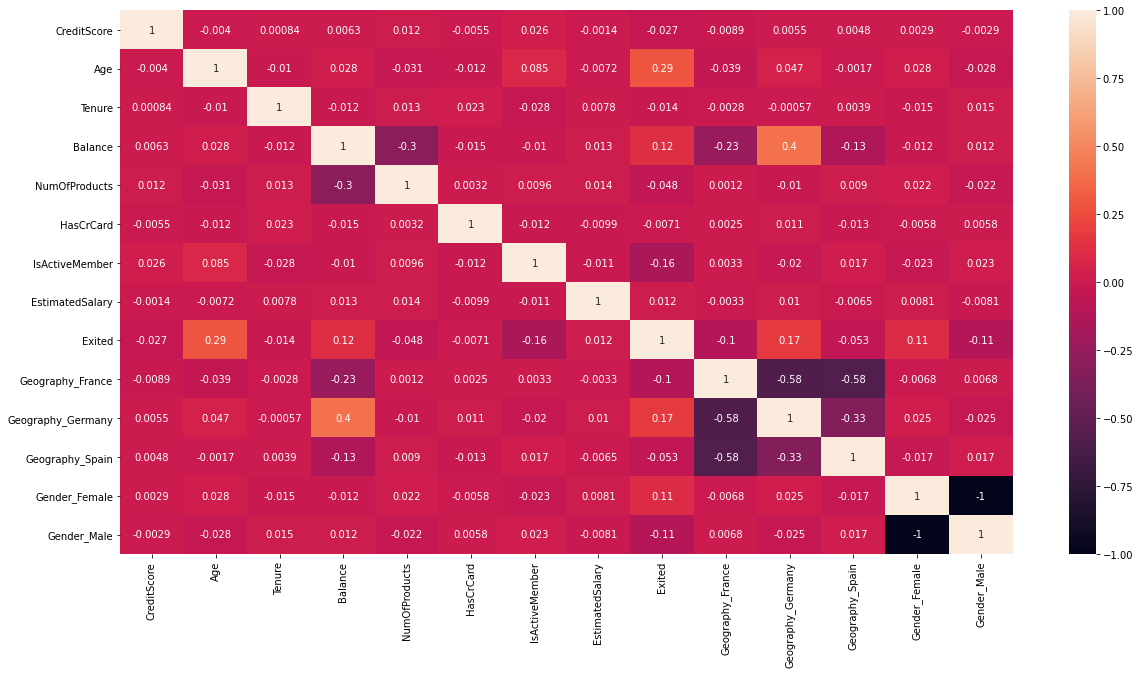

In [12]:
# Correlation heatmap

plt.figure(figsize=(20, 10))
sb.heatmap(bank.corr(), annot=True)

In [13]:
# Splitting data into train/test

X = bank.iloc[:, :-1].values
y = bank.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Checking shape of train/test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 13), (3000, 13), (7000,), (3000,))

In [15]:
# Normalizing or scaling train/test data

norm = Normalizer()

norm.fit_transform(X_train)
norm.transform(X_test)

array([[2.56008720e-03, 1.50088864e-04, 3.43060262e-05, ...,
        4.28825327e-06, 0.00000000e+00, 4.28825327e-06],
       [3.17309080e-03, 2.42683809e-04, 1.21341905e-05, ...,
        0.00000000e+00, 0.00000000e+00, 6.06709523e-06],
       [5.79652830e-03, 3.44835961e-04, 6.56830403e-05, ...,
        0.00000000e+00, 8.21038003e-06, 8.21038003e-06],
       ...,
       [2.88827064e-03, 1.68658140e-04, 8.43290698e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.06140392e-03, 4.04966576e-04, 5.86908081e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.69247620e-03, 5.15637940e-04, 4.20928930e-05, ...,
        1.05232233e-05, 0.00000000e+00, 1.05232233e-05]])

In [16]:
# Building neural network

n_cols = X_train.shape[1]

def build_model(act, opt, ep, bat, xtrain, ytrain, xtest, ytest): 
  model = Sequential()
  model.add(Dense(13, activation=act, kernel_initializer='normal'))
  model.add(Dense(7, activation=act, kernel_initializer='normal'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  
  model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=ep, batch_size=bat, verbose=False)
  return model

In [17]:
# Confusion matrix

def print_confusion_matrix(xtest, ytest, model):
  # Declaring y_pred with 0.5 as threshold
  y_pred = (model.predict(xtest) > 0.5).astype('int32')
  # Drawing confusion matrix
  cm = confusion_matrix(ytest, y_pred)
  sb.heatmap(cm, annot=True, fmt='.0f')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()
  # Printing model accuracy, precision, recall, and F1
  print()
  print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
  print("Precision: %.2f" % precision_score(ytest, y_pred))
  print("Recall: %.2f" % recall_score(ytest, y_pred))
  print("F1: %.2f" % f1_score(ytest, y_pred))

In [18]:
model = build_model('relu', 'adam', 50, 10, X_train, y_train, X_test, y_test)

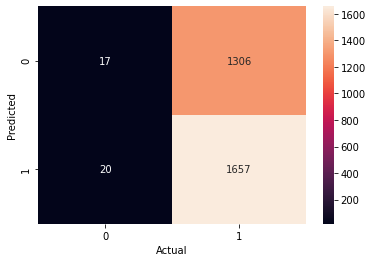


Accuracy: 0.56
Precision: 0.56
Recall: 0.99
F1: 0.71


In [19]:
print_confusion_matrix(X_test, y_test, model)

In [26]:
model_2 = build_model(LeakyReLU(), 'adam', 50, 10, X_train, y_train, X_test, y_test)

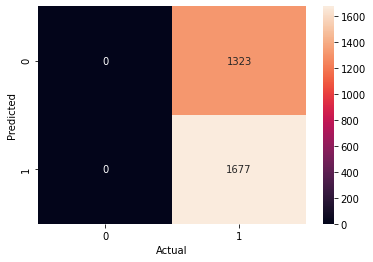


Accuracy: 0.56
Precision: 0.56
Recall: 1.00
F1: 0.72


In [27]:
print_confusion_matrix(X_test, y_test, model_2)